In [1]:
#graph, pandas
import pandas as pd
from pandas import plotting 
import matplotlib.pyplot as plt

#ファイル取得用（引数に指定されたパターンにマッチするファイルパス名を取得）
import glob 

#mfcc用
import librosa #librosa mfccの計算を実行してくれるライブラリ
import librosa.display #librosa3次元で描写


#SVM用
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#主成分分析器
from sklearn.decomposition import PCA


In [2]:
list_ceps = []  # 抽出したMFCCを格納するリスト
list_label = []  # 正常(0)、異常(1)ラベルを格納するリスト

In [3]:
# normalのwavを処理
filelist = glob.glob('normal/*.wav')  # ワイルドカードでnormal*.wavのリストを作成

for filename in filelist:
    y, sr = librosa.core.load(filename,sr=None, duration = 2) #sr:sampling rate, duration:data time
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20) #number of n_mfcc
    
    # 複数のローリングウィンドウでそれぞれ20次元のMFCCを得られるので、その平均をとる。
    ceps = mfcc.mean(axis=1)
    
    # リストに追加
    list_ceps.append(ceps)  # 20次元のMFCCを追加
    list_label.append(0)  # 正常ラベル(0)を追加

In [4]:
# abnormalのwavを処理
filelist = glob.glob('abnormal/*.wav')  # ワイルドカードでnormal_*.wavのリストを作成

for filename in filelist:
    y, sr = librosa.core.load(filename,sr=44100, duration = 2) #sr:sampling rate, duration:data time
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, dct_type=1) #number of n_mfcc
    
    # 複数のローリングウィンドウでそれぞれ20次元のMFCCを得られるので、その平均をとる。
    ceps = mfcc.mean(axis=1)
    
    # リストに追加
    list_ceps.append(ceps)  # 20次元のMFCCを追加
    list_label.append(1)  # 正常ラベル(0)を追加

In [5]:
# データフレーム化

# 20次元のMFCCのデータフレームを作成
df_ceps = pd.DataFrame(list_ceps)  

columns_name = []  # カラム名を"dct+連番"でつける
for i in range(20):
    columns_name_temp = 'dct{0}'.format(i)
    columns_name.append(columns_name_temp)

df_ceps.columns = columns_name

# ラベル（正常0、異常1）のデータフレームを作成
df_label = pd.DataFrame(list_label, columns=['label'])  

# list_cepsとlist_labelを結合
df = pd.concat([df_label, df_ceps], axis = 1)

In [6]:
df

,label,dct0,dct1,dct2,dct3,dct4,dct5,dct6,dct7,dct8,...,dct10,dct11,dct12,dct13,dct14,dct15,dct16,dct17,dct18,dct19
0,0,-641.633179,152.604904,-7.816092,16.141949,25.246931,12.833129,3.272949,4.649405,6.489331,...,4.831713,0.375044,0.607842,5.417467,6.638045,-3.147071,-0.405523,6.264078,0.243273,-3.790105
1,0,-660.093506,154.249588,-7.521862,6.367113,14.308826,13.403645,12.058455,8.475844,-6.984398,...,17.630919,1.222945,-3.448983,-0.204842,0.431923,-1.267240,1.026067,2.191524,0.541128,3.131107
2,0,-576.024658,127.442284,-2.661896,-9.769125,17.677374,14.205758,12.808265,5.700335,-5.426436,...,21.101732,1.262970,-7.977624,0.650806,0.641951,-1.821121,2.520283,2.507338,0.232495,2.238551
3,0,-579.229309,141.097855,-7.227318,-6.976886,18.515648,14.754383,11.769239,5.612917,-3.334284,...,18.407682,0.276844,-6.006950,-0.313301,-0.118504,0.116944,3.272504,1.784416,0.610133,3.433226
4,0,-553.769287,133.153229,1.340187,-7.915651,13.952166,19.046865,14.813342,4.687249,-5.687983,...,14.312056,0.119192,-3.732312,-0.353904,-2.048469,1.119559,3.453266,1.551027,-0.607079,0.768260
5,0,-532.908508,147.296265,-4.782976,-3.181885,17.538185,11.488092,9.040757,6.207633,-4.779520,...,15.211403,5.717576,-5.106402,-1.147962,-0.289262,-2.381544,1.552392,4.122832,0.493190,-0.321988
6,0,-601.389709,158.436386,-13.726312,1.043253,24.284349,14.874339,13.788103,4.792080,-10.038089,...,17.289034,-0.017933,-4.544577,-2.840168,-1.211264,-0.876441,1.624591,2.180076,0.389002,1.510136
7,0,-610.040161,169.305267,-23.493944,-0.575407,23.136513,15.503342,12.294964,11.420509,-8.466729,...,18.880878,4.578023,-2.979050,-3.418238,-1.646601,-4.723835,1.312301,4.241617,1.630805,1.295097
8,0,-561.034241,156.612503,-9.882668,1.144676,17.613253,14.433594,13.124911,3.039916,-9.814303,...,16.706671,0.729507,-3.583984,-5.221073,-6.080312,-2.892196,1.076710,-2.574894,-2.699388,1.546584
9,0,-598.012878,163.310715,-9.384558,-0.149591,13.154146,10.910661,17.644758,6.764947,-9.795102,...,15.710844,2.514121,-1.470070,-3.846838,-4.029168,-0.895814,2.410780,1.269518,0.305461,1.785883


In [7]:
#サポートベクトルマシンにてラベル0と1を分類

In [8]:
x_train, x_test, y_train, y_test = train_test_split(list_ceps, list_label, test_size = 0.2, random_state = 1)

In [9]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [10]:
model_linear = SVC(kernel='linear', random_state = 1)
model_poly = SVC(kernel = "poly", random_state = 1)
model_rbf = SVC(kernel = "rbf", random_state =1)
model_linear.fit(x_train_std, y_train)
model_poly.fit(x_train_std, y_train)
model_rbf.fit(x_train_std, y_train)

SVC(random_state=1)

In [11]:
pred_linear_test = model_linear.predict(x_test_std)
pred_poly_test = model_poly.predict(x_test_std)
pred_rbf_test = model_rbf.predict(x_test_std)
accuracy_linear_test = accuracy_score(y_test, pred_linear_test)
accuracy_poly_test = accuracy_score(y_test, pred_poly_test)
accuracy_rbf_test = accuracy_score(y_test, pred_rbf_test)
print("-"*40)
print("test_result")
print("Linear : "+str(accuracy_linear_test))
print("Poly : "+str(accuracy_poly_test))
print("RBF : "+ str(accuracy_rbf_test))

----------------------------------------
test_result
Linear : 1.0
Poly : 0.3333333333333333
RBF : 1.0


In [12]:
pred_linear_train = model_linear.predict(x_train_std)
pred_poly_train = model_poly.predict(x_train_std)
pred_rbf_train = model_rbf.predict(x_train_std)
accuracy_linear_train =accuracy_score(y_train, pred_linear_train)
accuracy_poly_train =accuracy_score(y_train, pred_poly_train)
accuracy_rbf_train =accuracy_score(y_train, pred_rbf_train)
print("train_result")
print("Linear : "+str(accuracy_linear_train))
print("Poly : "+str(accuracy_poly_train))
print("RBF : "+ str(accuracy_rbf_train))

train_result
Linear : 1.0
Poly : 0.9090909090909091
RBF : 1.0


In [13]:
print("Linear : "+str(model_linear.predict(x_train_std)))
print("Poly   : "+str(model_poly.predict(x_train_std)))
print("RBF    : "+str(model_rbf.predict(x_train_std)))

Linear : [1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0]
Poly   : [1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0]
RBF    : [1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0]


In [14]:
#mfccの結果をグラフで解析

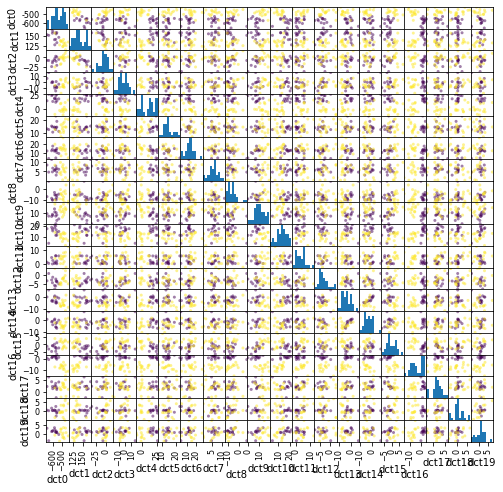

In [15]:
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
plt.show()

In [16]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,dct0,dct1,dct2,dct3,dct4,dct5,dct6,dct7,dct8,dct9,dct10,dct11,dct12,dct13,dct14,dct15,dct16,dct17,dct18,dct19
0,-1.819098,0.785948,-0.133630,2.665629,1.453350,-0.495805,-1.898566,-0.415118,2.972241,-0.774892,-1.753363,-0.944404,1.274234,2.586985,2.796721,-0.886707,0.560448,2.129814,-0.111975,-1.881201
1,-2.130554,0.899183,-0.107732,1.303559,0.451424,-0.333036,-0.193764,1.065816,-0.211369,-0.281926,1.031087,-0.681949,-0.167296,1.013717,0.997426,-0.274974,0.829554,0.098509,0.002555,0.942037
2,-0.712175,-0.946478,0.320046,-0.944938,0.759982,-0.104191,-0.048265,-0.008380,0.156751,0.059659,1.786158,-0.669559,-1.776478,1.253149,1.058318,-0.455218,1.110431,0.256030,-0.116119,0.577953
3,-0.766243,-0.006303,-0.081806,-0.555855,0.836767,0.052333,-0.249885,-0.042213,0.651090,0.663965,1.200071,-0.974800,-1.076230,0.983367,0.837845,0.175465,1.251831,-0.104548,0.029089,1.065274
4,-0.336691,-0.553284,0.672313,-0.686666,0.418754,1.276989,0.340814,-0.400471,0.094952,-0.539178,0.309073,-1.023599,-0.267972,0.972006,0.278304,0.501735,1.285810,-0.220957,-0.438950,-0.021794


In [23]:
dfs

,dct0,dct1,dct2,dct3,dct4,dct5,dct6,dct7,dct8,dct9,dct10,dct11,dct12,dct13,dct14,dct15,dct16,dct17,dct18,dct19
0,-1.819098,0.785948,-0.133630,2.665629,1.453350,-0.495805,-1.898566,-0.415118,2.972241,-0.774892,-1.753363,-0.944404,1.274234,2.586985,2.796721,-0.886707,0.560448,2.129814,-0.111975,-1.881201
1,-2.130554,0.899183,-0.107732,1.303559,0.451424,-0.333036,-0.193764,1.065816,-0.211369,-0.281926,1.031087,-0.681949,-0.167296,1.013717,0.997426,-0.274974,0.829554,0.098509,0.002555,0.942037
2,-0.712175,-0.946478,0.320046,-0.944938,0.759982,-0.104191,-0.048265,-0.008380,0.156751,0.059659,1.786158,-0.669559,-1.776478,1.253149,1.058318,-0.455218,1.110431,0.256030,-0.116119,0.577953
3,-0.766243,-0.006303,-0.081806,-0.555855,0.836767,0.052333,-0.249885,-0.042213,0.651090,0.663965,1.200071,-0.974800,-1.076230,0.983367,0.837845,0.175465,1.251831,-0.104548,0.029089,1.065274
4,-0.336691,-0.553284,0.672313,-0.686666,0.418754,1.276989,0.340814,-0.400471,0.094952,-0.539178,0.309073,-1.023599,-0.267972,0.972006,0.278304,0.501735,1.285810,-0.220957,-0.438950,-0.021794
5,0.015265,0.420452,0.133347,-0.027042,0.747232,-0.879547,-0.779339,0.187958,0.309606,-1.323330,0.504725,0.709297,-0.756234,0.749807,0.788338,-0.637590,0.928490,1.061805,-0.015878,-0.466518
6,-1.140125,1.187441,-0.653852,0.561708,1.365178,0.086557,0.141870,-0.359898,-0.932903,-0.414301,0.956711,-1.066044,-0.556598,0.276284,0.521029,-0.147801,0.942062,0.092799,-0.055940,0.280825
7,-1.286072,1.935754,-1.513607,0.336157,1.260037,0.266013,-0.147870,2.205479,-0.561618,-0.828729,1.303014,0.356566,-0.000312,0.114526,0.394814,-1.399816,0.883359,1.121053,0.421555,0.193108
8,-0.459263,1.061868,-0.315532,0.575841,0.754108,-0.039189,0.013179,-1.038032,-0.880027,-0.095947,0.830018,-0.834685,-0.215266,-0.389954,-0.890619,-0.803766,0.839073,-2.278880,-1.243480,0.295693
9,-1.083153,1.523034,-0.271688,0.395492,0.345656,-1.044290,0.890243,0.403653,-0.875490,-0.605728,0.613378,-0.282284,0.535880,-0.005408,-0.295945,-0.154105,1.089847,-0.361368,-0.088063,0.393305


In [17]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

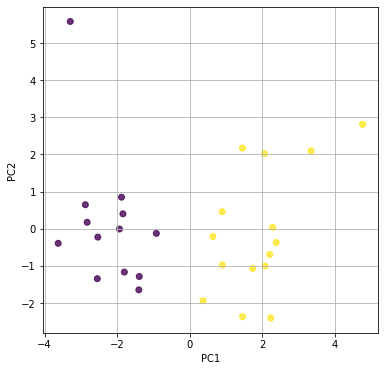

In [18]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

array([[<AxesSubplot:xlabel='dct0', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct1', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct2', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct3', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct4', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct5', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct6', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct7', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct8', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct9', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct10', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct11', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct12', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct13', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct14', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct15', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct16', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct17', ylabel='dct0'>,
        <AxesSubplot:xlabel='dct18', ylabel='dct0'>,
   

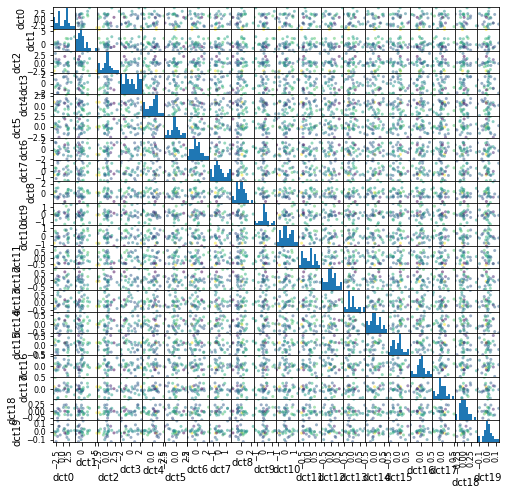

In [19]:
plotting.scatter_matrix(pd.DataFrame(feature, columns=dfs.columns), figsize=(8, 8), c=list(df.iloc[:, 4]),alpha=0.5)

In [20]:
f_df = pd.DataFrame(pca.explained_variance_ratio_, index=dfs.columns)
f_df.columns=['Feature']
f_df

,Feature
dct0,0.267547
dct1,0.148834
dct2,0.120694
dct3,0.102536
dct4,0.081858
dct5,0.068131
dct6,0.050071
dct7,0.047165
dct8,0.036673
dct9,0.021203


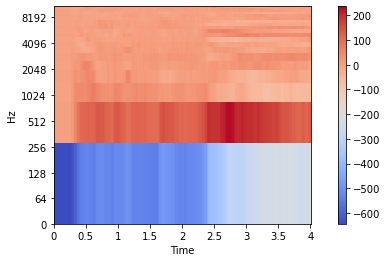

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
librosa.display.specshow(mfcc, y_axis='log' ,x_axis='time')
plt.colorbar(aspect=30, pad=0.08, orientation='vertical')

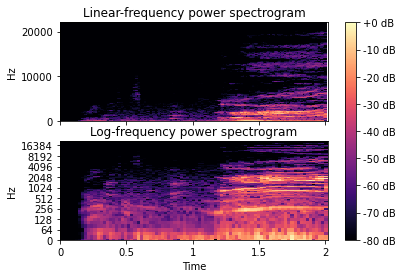

In [22]:
import matplotlib.pyplot as plt
import numpy as np
#y, sr = librosa.load(librosa.ex('choice'), duration=15)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")